# Particle Physics - Neutrinos in the SM

 
## Universidade de Santiago 


Jose A. Hernando

*Departamento de Física de Partículas. Universidade de Santiago de Compostela*

February 2020


In [1]:
import time
print(' Last version ', time.asctime() )

 Last version  Thu Feb  3 15:52:28 2022


In [2]:
# general imports
%matplotlib inline
%reload_ext autoreload
%autoreload 2
 
# numpy and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats     as stats
import scipy.constants as units

plt.style.context('seaborn-colorblind');

*Objective:*

Show how the neutrinos experiments helped to construct the SM.

How parity violation and Neutral Current were fundamental to the acceptance of the SM.


## Pauli postulated the existence of the neutrino

The $\beta$ decay in nucleai was a mistery in the 20's of XX century.

$$
^A_Z X \to ^A_{Z+1}X' + e \;\; (?)
$$

| |
|:--:|
|<img src="./imgs/bspectrum_1935.png" width=500 align="center">|
||

The spectrum was continuous. 

If only an electron, $\beta$, was emitted, the released energy will be mono-cromatic.

N. Bohr: *”At the present stage of atomic theory, however, we may say that we have no argument... for upholding the energy principle in the case of 𝛽-ray disintegrations.”*




[Pauli](https://en.wikipedia.org/wiki/Wolfgang_Pauli) postulated the existence of a light neutral particle that scape undetected in β decays! 

This is his famous letter, sent to the Gauverein meeting in Tubingen.

| |
| :--: |
|<img src="./imgs/Pauli_letter_neutrino.jpg" width=800 align="center">|
||



*I have hit upon a desperate remedy to save... the law of conservation of energy. Namely, the possibility that there could exist in the nuclei electrically neutral particles, that I wish to call neutrons, which have spin 1/2*

*The continuous beta spectrum would then become understandable by the assumption that in beta decay a neutron is emitted in addition to the electron such that the sum of the energies of the neutron and the electron is constant.*

Later Pauli will comment: *“I have done a terrible thing. I postulated a particle that can not be detected!”*



The neutron was discovered by Chadwick (1932) [[1]](https://www.nature.com/articles/129312a0)

Later [Fermi](https://en.wikipedia.org/wiki/Enrico_Fermi) named Pauli's particle, neutrino, in Paris Solvay Conference in 1932.



Fermi constructed the theory of  $\beta$-decay [2] in 1934, explaining it in terms of a 4-fermion interaction $n \to p + e + \bar{\nu}_e$ with strength $G_F$ .


*Theory of β rays emission of radioactive substances, built on the hypothesis that the electron emitted by the nuclei do not exist before the decay. On the contrary they are created together with a neutrino.*

| |
| :--: |
|<img src="./imgs/fermi_currents_SM.png" width=300 align="center">|
||

$$
\frac{G_F}{\sqrt{2}} \, (\bar{\Psi}_n \gamma_\mu \Psi_p) \, (\bar{\Psi}_\nu \gamma^\mu \Psi_e)
$$



The strength of the interaction is controlled by Fermi constant $G_F$. 

In the modern view, $G_F$ is expressed in term of the weak constant, $g$, and the $W$ mass, $m_W$:

$$
\frac{G_F}{\sqrt{2}} = \frac{g^2}{ 8 m^2_W}
$$

$$
G_F = 1.11663787(6) \times 10^{-5} \; \mathrm{GeV}^{-2}
$$

Fermi argued that the weak interaction is weak because is short range, not because the coupling is itself small. 

This interaction would also predict the scattering of neutrinos off matter, via the inverse process $\bar{\nu}_e + p \to n + e^+$

In 1934 [Bethe](https://en.wikipedia.org/wiki/Hans_Bethe) and Peierls were able to estimate the cross section for this process [[3]](https://www.nature.com/articles/133532a0), finding it smaller than $10^{-44} \; \mathrm{cm^2}$ for a neutrino energy of 2 MeV.

$$
\sigma(\bar{\nu}_e + p \to n + e^+) \simeq 10^{-47} \mathrm{(E/MeV)^2 m^2}
$$

Bether: *“it was absolutely impossible to observe processes of this kind".*


*question*: What is the mean free path for a 1 MeV $\nu$ in water? and in lead?

*question*: What is the energy threshold for the inverse $\beta$ decay?

## The discovery of the neutrino. The experiment of Cowan and Reines

B. Pontecorvo [[>]](https://www.youtube.com/watch?v=yXrHnsBgQSw&t=9s) who suggested that indeed one could use the large neutrino fluxes becoming available [4] in nuclear reactors.

F. Reines and C. L. Cowan devised a method to detect antineutrinos coming from a nuclear reactor. 

Using the Savanna River reactor, SC, with 0.7 GW, with produced a flux $𝜙 \simeq 10^{17}$ $\nu\mathrm{/(m^2 \, s)}$ 

*question*: the Savannah River reactor had 0.7 GW power, each fission releases 196 MeV, and 6 neutrinos that takes 9 MeV/fission. Compute the neutrino flux at 10 m below the reactor, and the rate of interaction on the free protons (H) in a 100 kg water detector.



| |
| :--: |
| <img src="./imgs/cowan_reines_detector.png" width=500 align="center">|


  - two modules 100 kg water blocks sandwiched between two liquid scintillator chambers
  - looking the inverse $\beta$ interaction
  - main backgrounds: neutrons spallation, cosmic rays, and natural radioactivity
  - counting experiment: using on/off of the reactor
  

| |
| :--: |
| <img src="./imgs/cowan_reines_method.png" width=500 align="center">|

It exploits simultaneous emission of a neutron and a positron in inverse beta decays to significantly reduce backgrounds.

They observed $2.9\pm0.2$ events/hour not explained by background.


| |
| :--: |
| <img src="./imgs/cowan_reines_osciloscope.png" width=500 align="center">|


In 1956 they were able to detect neutrinos [[6]](https://www.nature.com/articles/178446a0) and soon wrote a telegram to Pauli. 

| |
| :--: |
| <img src="./imgs/cowan_reines_telegram.png" width=500 align="center">|


[Reines](https://en.wikipedia.org/wiki/Frederick_Reines) received the Nobel Prize in Physics in 1995

## The helicity of the neutrino. 

| |
| :--: |
| <img src="./imgs/goldhaber_decays.png" width=300 align="center">|



[Goldhaber](https://en.wikipedia.org/wiki/Maurice_Goldhaber) at Brookhaven measured the neutrino helicity in 1958 via a ingenious experiment [6].

Measuring the gamma polarization of the electron capture in S wave in $\mathrm{^{152}Eu}$:

$$
\mathrm{Eu}  + e^- \to \mathrm{^*Sm} + \nu_e \to \mathrm{Sm} + \gamma + \nu_e
$$

The gamma has the same polarization as the neutrino helicity. 




| |
| :--: |
| <img src="./imgs/goldhaber_experiment.png" width=300 align="center">|


- Only neutrinos going upwards are selected.

   - the recoil of Sm$^*$ is transfered to the gamma.

   - Only gammas which are back-to-back to neutrinos have enough energy to produce resonance absortion.

- the polarization of the gamma is selected via the $B$ field orientation (up/down) in the ferro-magnetic support.

   - Only electrons with oposite spin to the $B$ suffer E.C. 
   
   - This select electrons with spin up/down.

- Switch  the polarity of $B$ and detect number of gammas in NaI (that is helicity of the neutrino).

- Measured neutrino helicity:

$$
-1 \pm 0.3
$$

## The neutrino masses

Fermi [8] and Perrin [9] suggested in 1933 that the mass of the neutrino can be meaured at the end point of the $\beta$ spectrum in $\mathrm{^3H} \to \mathrm{^3H} + e + \bar{\nu}_e$ due its small $Q$-value, 18.6 keV.

The decay is super-allowed and depends on the phase space:

$$
\frac{\mathrm{d}N_e}{\mathrm{d}E} \propto p^2_e E_\nu p_\nu F(E) 
$$

where $F(E)$ is the Fermi function (we can approximate as constant at the end point), $p_e, p_\nu$, the momentum of the electron and neutrino, and $E_\nu$, the energy of the neutrino.


If we sustitute, $E_\nu = (Q-E_e), \; p_\nu = \sqrt{(Q-E_e)^2 - m^2_{\nu_e}}$ 

$$
\frac{\mathrm{d}N_e}{\mathrm{d}E} \propto p^2_e  F(E) (Q- E_e) \sqrt{(Q-E_e)^2 - m^2_{\nu_e}}
$$

The Kurie plot is linear in $E_e$ and the end point is lowered due to $m_{\nu_e}$. 

$$
K(E_e) = \frac{1}{p_e}\sqrt{\frac{\mathrm{d}N_e}{\mathrm{d} E}}
$$


In [1]:
def tritium_spectrum(Q0 = 18.6e3, m_nu = 1):
    def fun(E_e, FE = 1.):
        Enu  = Q0 - E_e
        pnu2 = Enu**2 - m_nu**2
        Enu[Enu   < 0] = 0.
        pnu2[pnu2 < 0] = 0.
        dNdE = FE * Enu * np.sqrt(pnu2)
        return np.sqrt(dNdE)
    return fun

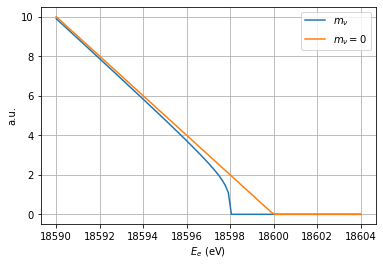

In [8]:
Q0, m_nu = 18.6e3, 2. # eV
fe       = tritium_spectrum(Q0, m_nu)
fe0      = tritium_spectrum(Q0, 0.)
enes     = np.linspace( Q0 - 10, Q0 + 4, 100)
plt.plot(enes, fe(enes) , label = r'$m_\nu$'); 
plt.plot(enes, fe0(enes), label = r'$m_\nu = 0$');
plt.legend(); plt.grid(); plt.xlabel(r'$E_e$ (eV)'); plt.ylabel('a.u.');



*Question*: Show that in the current paradigm of 3 neutrinos $m_{\nu_e} \to m^{eff}_{\nu_e}$ with:

$$
(m^{eff}_{\nu_e})^2 = \sum_{i=1,3} |U_{ei}|^2 m^2_i
$$

where $U_{ei}$ are the elements of the $U_{PMNS}$ matrix related with the electron flavour.



#### The Katrin experiment

| |
| :--: |
| <img src="./imgs/Katrin_spectrum.png" width=400 align="center">|

The best limit has been obtained by [KATRIN experiment](http://www.katrin.kit.edu) in 2019 [[9]](https://arxiv.org/abs/1909.06048) with best estimated of $\hat{m}_\nu = −1.0^{+0.9}_{−1.1}$ eV and $m^{eff}_\nu < 0.8$ eV at 90% C.L. with F.C. method.

   - A large spectrometer currently taken data.

   - The experiment has an estimated sensitivity 0.2 eV.


Other neutrino mass limits:

- $m^{eff}_{\nu_\mu} \le 190$ keV at 90% CL, using pion decay, $\pi^+ \to \mu^+ \, \bar{\nu}_{\mu}$ [[10]](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.53.6065)

- $m^{eff}_{\nu_\tau} \le 18.2$ MeV at 95% CL, using tau decays, $\tau \to 5 \pi \, \bar{\nu}_\tau$ [[11]](http://cds.cern.ch/record/337738)

The current limits from Cosmology are more stringent:

- From Cosmic Microwave Background and Large Scale Structures formation, the bound obtained by Planck [[12]](https://arxiv.org/abs/1807.06209) at 95 % C.L. is:

$$
\sum_{i=1, 3} m_i \le 0.12 \; \mathrm{eV}
$$

but it may depend on model assumptions.

## The three neutrino families

In the SM helicity and quirality are related.

$$
P_{R, L } = \frac{1}{2}(1 \pm \gamma^5) = \frac{1}{2} \left(1 \pm \frac{{\bf s} \cdot {\bf p}}{|p|} \right) + \mathcal{O}\left(\frac{m}{E}\right)
$$

The helicity operator, that measures the proyection of the spin ${\bf s}$ along the momentum ${\bf p}$ is:

$$
\Sigma = \frac{{\bf s} \cdot {\bf p}}{|p|}
$$


If the mass is zero, helicity and quirality are the same and good quantum numbers.

Landau [13], Lee and Yang [14] and Salam [15] in 1957 proposed that neutrinos can be described with a left-handed Weyl spinor. 

This property was embedded in the V-A theory of weak interactions and ultimately in the SM  by S. L. Glashow [16], S. Weinberg [17] and A. Salam [18] in 1961.

*question*: Write the helicity states as left and right states.


### The discovery of the muon and the muon neutrino

- The muon was discovered in 1937 by J. C. Street and E. C. Stevenson [19] and by S.
H. Neddermeyer and C. D. Anderson [20]. 
   - Initially they thought is was the $\pi$ postulated by Yukawa.
   
   
- In 1949 Brown at al [[21]](https://www.nature.com/articles/163047a0), using Kodak emulsions showed $\pi, \, \mu$ decays, and the need of missing particles!
   - It took a decade to understand it was a heavy version of e, $\mu$, "similar” β decay



| |
| :--: |
| <img src="./imgs/mu_emulsion.png" width=800 align="center">|


- It can enter Fermi interactions with a neutrino. But is the same neutrino of the $\beta$ decay?

- Rabi: *How order this?* Why there are three families?

### The discovery of the $\nu_\mu$

- Following a suggestion by Pontecorvo [20] 

- L. M. Lederman, M. Schwartz and J. Steinberger et al. created the first accelerator neutrino beam, from pion decays from a boosted proton beam hitting a target. They got the Nobel Price in 1988.

- 15 GeV p in Be target, 13.5 Iron filter 

$$
\pi^- \to \mu^- + \bar{\nu}_\mu, \; \pi^+ \to \mu^+ + \nu_\mu, 
$$




| |
| :--: |
| <img src="./imgs/brookhaven_munu_experiment.png" width=800 align="center">|




| |
| :--: |
| <img src="./imgs/brookhaven_munu_discovery.png" width=700 align="center">|



- Spark chambers were a novel technology. Fotographs syncronized with the beam pulse.

- 10 modules of 9 spark chambers $1.1 \times 1.1$ m$^2$, 10 tons.

- detector surounded by anti-coincidance scintillation planes.

- Search for $\nu + n \to p + \mu^-, \;\; \nu + n \to p + e^-$ 

- 10 triggers per hour (mostly empty photographs).

- 34 events with penitrating tracks originated in the chambers

- Neutrinos produced in pion decays associated with a muon do not lead to electrons in scatterings off matter [22]    

### nuetrinos maximally violate C and P in SM

| |
| :--: |
| <img src="./imgs/SM_pidecay_CP.png" width=500 align="center">|

Pion decays to leptons are helicity supressed. Pions decays to munos 99% of the cases.

$$
\frac{m^2_e}{m^2_\mu} = 0.22 \times 10^{-4}, \;\; \frac{\Gamma(\pi^+ \to e^+ \, \nu_e)}{ \Gamma(\pi^+ \to \mu^+ \, \nu_\mu)} = 1.2 \times 10^{-4}
$$

*questions:* Apply the same argument to kaon semileptonic decays.



### The third family: the tau and the tau neutrino

| |
| :--: |
| <img src="./imgs/tau_discovery.png" width=600 align="center">|


- Perl et al, in 1973 at SPEAR in SLAC, discovered triton (tau) $\tau$, at threshold production [[23]](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.35.1489)

   - They discover $e, \mu$ events at a given energy threshold. 
   
   - They are the product of leptonic decays of a new charged lepton $\tau$ with $m_\tau \simeq 1800$ MeV


| |
| :--: |
| <img src="./imgs/nutau_discovery.png" width=500 align="center">|

- Niwa et al, in 2000 Fermilab, with emulsion technique  produce $\nu_\tau$ from Ds semileptonics decays [[24]](https://arxiv.org/abs/hep-ex/0012035) 

   - They observed the kink from $\tau \to \mu \, \nu_{\tau} \, \bar{\nu}_\mu$

### Lepton Universality


- Lepton Universality implies that the coupling to each lepton doublet is the same, $g/\sqrt{2}$.


| |
| :--: |
| <img src="./imgs/lepton_universality.png" width=1000 align="center">|



*question* Compare the decay width, $\tau \to \nu_\tau \, \mu \, \bar{\nu}_\mu$ and $\tau \to \nu_\tau \, e \, \bar{\nu}_e$

$$
\Gamma(\tau \to \nu_\tau \, \mu \, \bar{\nu}_\mu) \propto \frac{g^2_\tau}{m^2_W} \frac{g^2_\mu}{m^2_W} m^5_\tau, \;\;\;
\Gamma(\tau \to \nu_\tau \, e \, \bar{\nu}_e) \propto \frac{g^2_\tau}{m^2_W} \frac{g^2_e}{m^2_W} m^5_\tau
$$

$$
\frac{\mathrm{BR}(\tau \to \nu_\tau \, \mu \, \bar{\nu}_\mu)}{\mathrm{BR}(\tau \to \nu_\tau \, e \, \bar{\nu}_e)} = \frac{17.36 \pm 0.05}{17.84 \pm 0.05} = 0.974 \pm 0.004
$$

including phase space factor:
$$
\frac{g_\mu}{g_e} = 1.001 \pm 0.002 
$$




*question* Compare the decay width, $\mu \to \nu_\mu \, e \, \bar{\nu}_e$ and $\tau \to \nu_\tau \, e \, \bar{\nu}_e$

$$
\frac{\Gamma(\mu \to \nu_\mu \, e \, \bar{\nu}_e)}{\Gamma(\tau \to \nu_\tau \, e \, \bar{\nu}_e)}
=\frac{g^2_\mu}{g^2_\tau} \frac{m^5_\mu}{m^5_\tau} \frac{\rho_\mu}{\rho_\tau} 
$$

where $\rho_{\mu(_\tau)}$ are the phase-space factors.

$$
\frac{g^2_\mu}{g^2_\tau} = \frac{1}{\tau_\mu} \frac{\tau_\tau}{\mathrm{BR}(\tau \to \nu_\tau \, e \, \bar{\nu}_e)} \frac{m^5_\tau}{m^5_\mu} \frac{\rho_\tau}{\rho_\mu}
$$

where $\tau_{\mu(_\tau)}$ are the lifetimes of $\mu, \, (\tau)$.

$$
\frac{g_\mu}{g_\tau} = 1.001 \pm 0.003
$$


### Lepton Number Conservation (Violation)


- Lepton Number Conservation implies that with every lepton produced there is its anti-neutrino with the same flavour.

    - Total and floavour lepton numbers are preserved.
    
    - This is a phenomenological result and an accidental symmetry of the SM.
    
| |
| :--: |
| <img src="./imgs/lfv_muenu.png" width=400 align="center"> |
    
    
- Long history of search for Lepton Number Violation processes with null results

    - Strongest constrain $\mathrm{BR}(\mu \to e \, \gamma) < 4.2 \times 10^{-13}$ [](https://arxiv.org/abs/1605.05081) by MEG experiment 
    
    - $\mathrm{BR}(\mu \to e \, \gamma) \; \mathcal{O}(10^{-52})$ due to $U_{PMNS}$ matrix.

LFV searches summary [[26]](http://pdg.lbl.gov/2019/reviews/rpp2019-rev-conservation-laws.pdf)

| |
| :--: |
| <img src="./imgs/LFV_limits.png" width=1000 align="center">|


## Neutral currents

### Gargamelle

| |
| :--: |
| <img src="./imgs/gargamelle_nc.png" width=500 align="center">|

Neutral Currents were detected at Gargamelle experiment at CERN In 1973 [27].



- Gargamelle was a tank of 15 tons freon, a gigantic buble chamber

- $\nu_\mu$ interactions were recorded in photographs.

- NC were discover in  $\nu_\mu$ interactions without $\mu$ (penetrating track).

$$
\left.\frac{NC}{CC}\right|_{\nu} = 0.21 \pm 0.03, \;\; \left.\frac{NC}{CC}\right|_{\bar{\nu}} = 0.45 \pm 0.09
$$

### Only three neutrino families

Lepton Electron Positron (LEP) was a CERN $e^+e^-$ collider (1989-2000)

With 4 large general purpose detector, ALEPH, DELPHI, OPAL, L3

One of they main results was the measurement of the properties of the Z boson, in particular its width $\Gamma_Z$ .LEP collected 7 M Z events

The LEP detector deployed in large areas of Silicon Microstrip detector with excellent position resolution $\mathcal{0}(10) \; \mu\mathrm{m}$




| |
| :--: |
| <img src="./imgs/ALEPH_event.png" width=800 align="center">|



The LEP measurements (in MeV) [[28]](https://arxiv.org/abs/hep-ex/0509008):

| |
| :--: |
|<img src="./imgs/LEP_Zwidth_nus.png" width=600 align="center">|


The NC  lagrangian is:

$$
\mathcal{L}_{NC} = - \frac{g}{2 \cos \theta_W} \sum_{i} \bar{\psi}_i \gamma^\mu (g_V^i  - g_A^i \gamma^5 ) \psi_i Z_\mu
$$

where $i$ runs in the three generations, and

$$
g_V^i = T_3 - 2 Q \cos \theta_W, \;\; g_A^i = T_3
$$

Depends on the weak-isospin component $T_3$ and the charge $Q$ in electron units.

For neutrinos $g_V^\nu = g_A^\nu = 1/2$

The $e^+ \, e^- \to f \, \bar{f}$ cross section is enhanced in the $Z$ pole:

$$
\sigma(e^+ \, e^- \to f \, \bar{f}) = \frac{12 \pi s}{m^2_Z} \frac{\Gamma_{ee} \Gamma_{f\bar{f}}}{(s - m^2_Z)^2 + m^2_Z \Gamma^2_Z}
$$

where:

$$
\Gamma_{f \bar{f}} = \frac{G_F m^3_Z}{6 \sqrt{2} \pi} \left((g^f_V)^2 + (g^f_A)^2 \right)
$$

*Question:* Consider the case $\sqrt{s} = m_Z$, and compute the width of the resonance at half of the maximum.

*Question:* Compute the decay width with $Z \to f \bar{f}$.


*Question:* Calculate $\Gamma_{\nu \bar{\nu}}$

That is:
$$
\frac{G_F m^3_Z}{ 6 \sqrt{2} \pi} \simeq 334 \; \mathrm{MeV} \to \Gamma_{\nu\bar{\nu}} \simeq 167 \; \mathrm{MeV}
$$


$$
\Gamma_Z = 2495 ± 2, \; \Gamma_{l\bar{l}} =  83 \pm 0.1, \; \Gamma_{had} = 1746 \pm 2, \; \Gamma_{inv} = 499 \pm 1 
$$

$$
N_\nu = \frac{\Gamma_{\mathrm{inv}}}{\Gamma^{SM}_{\bar{\nu}\nu}} = 2.984 \pm 0.008
$$

In fact the cross section is distorted due to initial and final state radiation (QED calculable effects).

*question:* Verify the lepton universality in NC with LEP the decay with $Z \to l \bar{l}$.



## Summary

- Neutrinos only interact via CC and NC.

- they are massless and have negative helicity.

- there are three types of neutrinos: $\nu_e, \, \nu_\mu, \nu_\tau$

- they preserve lepton universality in CC and NC.

- they preserve lepton number and flavour lepton number.


***

## References

[1] J. Chadwick, Nature 129 (1932) 312

[2] E. Fermi, Nuovo Cim. 11 (1934) 1.

[3] H. Bethe and R. Peierls, Nature 133 (1934) 532.

[4] See, B. Pontecorvo, Cambridge Monogr. Part. Phys. Nucl. Phys. Cosmol., 1 (1991) 25.

[5] F. Reines and C. L. Cowan, Nature 178 (1956) 446; C. L. Cowan et al., Science 124 (1956) 103.

[6] M. Goldhaber, L. Grodzins, A.W. Sunyar, Phys. Rev. 109 (1958) 1015

[7] E. Fermi, Ricerca Scientifica 2 (1933) 12; E. Fermi, Z. Phys. 88 (1934) 161.

[8] F. Perrin, Comptes Rendues 197 (1933) 1625.

[9] M. Aker et al., KATRIN collaboration, Phys. Rev. Lett. 123, 221802 (2019). 

[10] K. Assamagan et al., Phys. Rev D53  (1996) 6065


[11] R  Barate  et al, ALEPH collaboration, Eur. Phys. J.  C2  (1998) 395

[12] N. Aghanim et al, Planck Collaboration, arXiv:1807.06209

[13] L. Landau, Nucl. Phys. 3 (1957) 127.

[14] T. D. Lee and C. N. Yang, Phys. Rev. 105 (1957) 1671.

[15] A. Salam, Nuovo Cim. 5 (1957) 299.

[16] S. L. Glashow, Nucl. Phys. 22 (1961) 579.

[17] S. Weinberg, Phys. Rev. Lett. 19 (1967) 1264.

[18] A. Salam, Proc. of the 8th Nobel Symposium on “Elementary Particle Theory, Relativistic Groups
and Analyticity", Stockholm, Sweden, 1968, edited by N. Svartholm, p. 367.

[19] J. C. Street and E. C. Stevenson, Phys. Rev. 52 (1937) 1003.

[20] S. H. Neddermeyer and C. D. Anderson, Phys. Rev. 51 (1937) 884.

[21] R. Brown et al, Nature 163 47 (1949)

[22] G. Danby et al., Phys. Rev. Lett. 9 (1962) 36.

[23] M. L. Perl et al., Phys. Rev. Lett. 35, 1489 Phys. (1975)

[24] K. Kodama et al., DONUT Collaboration, Phys. Lett. B504, 218 (2001)

[25] A. M. Baldini et al. (MEG), Eur. Phys. J. C76, 8, 434 (2016)

[26] A. Pich, M. Ramsey-Musolf, Particle Data Group, Tests of Conservation Laws (2019)

[27] F.J. Hasert et al, Gargamelle Collaboration, Phys. Lett. 45B 139 (1973)

[28] LEP Electroweak Working Group, arXiv:hep-ex/0509008